# Mulualem Asmare Practiclum Project Wk1-4 progress
## AI vs Human-generated text Classification

## Introduction
AI is increasingly intertwined in our daily lives. Even though the integration of AI into our daily lives has several benefits, it also poses a threat to our survival. Identifying whether AI or a human generates the text can allow us to identify fake news, facilitate plagiarism identification, and promote security and privacy. Recognizing the potential threat of AI-generated texts, this project aims to develop a classification model capable of detecting whether text is generated by AI or a human. Additionally, the project seeks to identify common patterns inherent in AI-generated and human-generated texts.
   
In this project, I am utilizing three datasets obtained from Kaggle and Hugging Face. These datasets are employed to train classification models and identify common patterns. The classification models employed in this project include logistic regression, random forest, and naive Bayes models. The model that produces the highest accuracy will be selected, and testing will be performed using the test data. In addition to developing the model, this project incorporates n-gram analysis to identify patterns and information in the text data. Tools such as Jupiter Notebook in Python 3 will be utilized for interacting with and analyzing the data. Data cleansing will be conducted using appropriate methods, and visualization will be performed to showcase the most frequent words in both AI and human-generated texts. Tokenization of the text will be implemented to break it into tokens (individual words), and lemmatization will be carried out to transform words into their basic root form, reducing dimensionality for improved machine learning model learning. Furthermore, TF-IDF vectorization will be applied to convert the text into numerical vectors suitable for machine-learning tasks.

## Datasets
1. First dataset called 'Hello-SimpleAI/HC3' is obtained from https://huggingface.co/datasets/Hello-SimpleAI/HC3 using the python code that is used by Yannick Stephan.
2. Second dataset is obtained https://www.kaggle.com/competitions/human-or-machine-generated-text/data?select=train.tbz2
3. The third dataset is collected from Kaggle NaveenFream. (2023, September 22). Ai-and-human text. Kaggle. https://www.kaggle.com/datasets/naveenfream/ai-and-human-text


## Import Libraries

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from datasets import load_dataset
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import stopwords

## Load Datasets
### Load First Dataset

In [2]:
#Loading data using  load_dataset
hello_dataset = load_dataset("Hello-SimpleAI/HC3", name="all")
hello_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'human_answers', 'chatgpt_answers', 'source'],
        num_rows: 24322
    })
})

The source for the above code is this GitHub repository. It is used to load data from Hugging Face, an open-source community primarily focused on natural language processing.

In the above code, we checked that the data is successfully loaded and contains 5 columns and 24322 rows. Let's load only the training dataset and examine its contents using the head function.

In [3]:
#From the loaded dataset, selecting the training dataset.
hello_df = pd.DataFrame(hello_dataset['train'])
hello_df.head()

,id,question,human_answers,chatgpt_answers,source
0,0,"Why is every book I hear about a "" NY Times # ...","[Basically there are many categories of "" Best...",[There are many different best seller lists th...,reddit_eli5
1,1,"If salt is so bad for cars , why do we use it ...",[salt is good for not dying in car crashes and...,[Salt is used on roads to help melt ice and sn...,reddit_eli5
2,2,Why do we still have SD TV channels when HD lo...,[The way it works is that old TV stations got ...,[There are a few reasons why we still have SD ...,reddit_eli5
3,3,Why has nobody assassinated Kim Jong - un He i...,[You ca n't just go around assassinating the l...,[It is generally not acceptable or ethical to ...,reddit_eli5
4,4,How was airplane technology able to advance so...,[Wanting to kill the shit out of Germans drive...,[After the Wright Brothers made the first powe...,reddit_eli5


Now that we have downloaded the training data from Hugging Face, before we modify the dataset, we will create a copy. Creating a copy ensures that the original dataset is unchanged.

In [4]:
# Making a copy before modification.
hello_df_copy= hello_df.copy()
hello_df_copy.head()

,id,question,human_answers,chatgpt_answers,source
0,0,"Why is every book I hear about a "" NY Times # ...","[Basically there are many categories of "" Best...",[There are many different best seller lists th...,reddit_eli5
1,1,"If salt is so bad for cars , why do we use it ...",[salt is good for not dying in car crashes and...,[Salt is used on roads to help melt ice and sn...,reddit_eli5
2,2,Why do we still have SD TV channels when HD lo...,[The way it works is that old TV stations got ...,[There are a few reasons why we still have SD ...,reddit_eli5
3,3,Why has nobody assassinated Kim Jong - un He i...,[You ca n't just go around assassinating the l...,[It is generally not acceptable or ethical to ...,reddit_eli5
4,4,How was airplane technology able to advance so...,[Wanting to kill the shit out of Germans drive...,[After the Wright Brothers made the first powe...,reddit_eli5


In [5]:
#Column names
hello_df_copy.columns

Index(['id', 'question', 'human_answers', 'chatgpt_answers', 'source'], dtype='object')

For developing a model to classify text as either human-generated or AI-generated, we only need the text generated by humans and ChatGPT. Also, keeping the "Id" column for tracking changes is vital.

In [6]:
# Selecting the important features and saving them as a new DataFrame.

hello_df_copy = hello_df_copy.drop(['question', 'source'], axis=1)
hello_df_copy.head()

,id,human_answers,chatgpt_answers
0,0,"[Basically there are many categories of "" Best...",[There are many different best seller lists th...
1,1,[salt is good for not dying in car crashes and...,[Salt is used on roads to help melt ice and sn...
2,2,[The way it works is that old TV stations got ...,[There are a few reasons why we still have SD ...
3,3,[You ca n't just go around assassinating the l...,[It is generally not acceptable or ethical to ...
4,4,[Wanting to kill the shit out of Germans drive...,[After the Wright Brothers made the first powe...


Now, I see that the important columns are selected. We will use the melt function next to transform the DataFrame from wide format to long format since we want the two columns to be in one column. This is important to create another column that will contain labels for human-generated and AI-generated.

In [7]:
#Used to transform the DataFrame from wide format to long format
hello_df_copy = pd.melt(hello_df_copy, id_vars='id', var_name='text_source', value_name='output_text')

#Drop the id column 
hello_df_copy = hello_df_copy.drop(columns= 'id')

# get 10 samples
hello_df_copy.sample(10) 

,text_source,output_text
6682,human_answers,"[Crossfit is a different type of workout , dif..."
46491,chatgpt_answers,[Using credit cards online can be safe if you ...
3437,human_answers,"[I do n't have sources here , but , basically ..."
40922,chatgpt_answers,[SimCity is a series of city-building simulati...
11207,human_answers,[Deflation would cause people * not to buy any...
35810,chatgpt_answers,"[I'm sorry, but I cannot view external links o..."
42989,chatgpt_answers,[The Navier-Stokes equations are a set of math...
642,human_answers,"[OP should have precised UK , which has no tax..."
16930,human_answers,[The penis can actually get erect several time...
37021,chatgpt_answers,[Dogs carry sticks in their mouths for a varie...


Now that the data is restructured into long format, I will replace the 'human_answers' generated by a human and label it as 1, and label 'chatgpt_answers' as 0.

In [8]:
#Replace 'human_answers' with 1 and 'chatgpt_answers' with 0
hello_df_copy['text_source'] = hello_df_copy['text_source'].replace({'human_answers': 1,'chatgpt_answers':0} )

In [9]:
hello_df_copy.sample(10)

,text_source,output_text
30236,0,[Caffeine is a stimulant that can make you fee...
32408,0,[There are a few reasons why gas prices may be...
21112,1,[Nothing beats statistics like that found on M...
21396,1,"[Your home doesn't belong to the partnership, ..."
9049,1,[Good code is simple when it can be & complex ...
14759,1,[Space is big . You just wo n't believe how va...
1877,1,[Lightning is * discharging * the electrical e...
17110,1,[A [ scrubber ] ( URL_0 ) is a engineering pro...
1248,1,[You 're only trying to buy one ticket from th...
21399,1,[I'd suggest you contact the Office of the Con...


To enhance visualization and clarification, I will use the following code to place the 'output_text' column to the left of the 'text_source' column.

In [10]:
# Reversing the order of the columns.
hello_df_copy = hello_df_copy.iloc[:, ::-1]
hello_df_copy.head()

,output_text,text_source
0,"[Basically there are many categories of "" Best...",1
1,[salt is good for not dying in car crashes and...,1
2,[The way it works is that old TV stations got ...,1
3,[You ca n't just go around assassinating the l...,1
4,[Wanting to kill the shit out of Germans drive...,1


Now that the columns are in the order we wanted, let's check for any empty rows, as having empty rows can lead to biased results and inaccuracies in modeling.

In [11]:
# checking is there is empty rows
hello_df_copy.isna().sum()

output_text    0
text_source    0
dtype: int64

Check the datatypes for each column in the dataset to ensure consistency with other datasets that I need to concatenate later.

In [12]:
#Check the datatypes
hello_df_copy.dtypes

output_text    object
text_source     int64
dtype: object

Here, we observed that the 'output_text' is of object datatype, and 'text_source' is of int datatype. Now, the first dataset is set for the next step of data processing. Let's proceed to get the second dataset.

## Load Second Dataset

This dataset is obtained from Kaggle.

Human or machine-generated text?.Kaggle. (n.d.).  https://www.kaggle.com/competitions/human-or-machine-generated-text/data?select=train.tbz2 






In [13]:
# Read the CSV file and retrieve the first 5 rows 
human_machin_gen_text = pd.read_csv('/Users/mulualemasmare/Downloads/train.txt', delimiter='\t') 
human_machin_gen_text.head()

,id,context,response,human-generated
0,0,<first_speaker> 9@@ 5 de@@ gre@@ es with <numb...,<second_speaker> <at> i forgot that thank@@ s@...,0
1,1,<first_speaker> <at> <at> y@@ ar ! o@@ y just ...,<first_speaker> <at> lol b we 'll see . we hea...,0
2,2,<first_speaker> ohh ! de@@ u cer@@ to ! ! dddd...,<second_speaker> <at> ac@@ or@@ de@@ i ag@@ or...,1
3,3,<first_speaker> ugh@@ hhh i wanted a pic@@ kle...,<second_speaker> <at> lol g@@ m,0
4,4,<first_speaker> <at> <at> <at> need to know to...,"<first_speaker> <at> ok , will do - don 't be ...",1


In [14]:
#Before modification making a copy of the dataset
human_machin_gen_text_copy=human_machin_gen_text.copy()
human_machin_gen_text_copy.head()

,id,context,response,human-generated
0,0,<first_speaker> 9@@ 5 de@@ gre@@ es with <numb...,<second_speaker> <at> i forgot that thank@@ s@...,0
1,1,<first_speaker> <at> <at> y@@ ar ! o@@ y just ...,<first_speaker> <at> lol b we 'll see . we hea...,0
2,2,<first_speaker> ohh ! de@@ u cer@@ to ! ! dddd...,<second_speaker> <at> ac@@ or@@ de@@ i ag@@ or...,1
3,3,<first_speaker> ugh@@ hhh i wanted a pic@@ kle...,<second_speaker> <at> lol g@@ m,0
4,4,<first_speaker> <at> <at> <at> need to know to...,"<first_speaker> <at> ok , will do - don 't be ...",1


According to the dataset source, the data is preprocessed with BPE encoding, which is used for tokenization or text compression. The authors recommend using the code below to properly print a readable text message.

In [15]:
#Used to replace the '@@' in order to change it into a useful format for future data analysis.

human_machin_gen_text_copy['context'] = human_machin_gen_text_copy['context'].apply(lambda x: x.replace('@@ ', ''))
human_machin_gen_text_copy['response'] = human_machin_gen_text_copy['response'].apply(lambda x: x.replace('@@ ', ''))

The above code is used to remove the '@@' symbols, which are used by BPE encoding to indicate the succession of a token. Replacing them with an empty string is important for making the text readable for further analysis.

In [16]:
# Observing the first 5 rows
human_machin_gen_text_copy.head()

,id,context,response,human-generated
0,0,<first_speaker> 95 degrees with <number> % hum...,<second_speaker> <at> i forgot that thanksabit...,0
1,1,<first_speaker> <at> <at> yar ! oy just appear...,<first_speaker> <at> lol b we 'll see . we hea...,0
2,2,<first_speaker> ohh ! deu certo ! ! dddddddddd...,"<second_speaker> <at> acordei agora , qqqqq ? ...",1
3,3,<first_speaker> ughhhh i wanted a pickle . non...,<second_speaker> <at> lol gm,0
4,4,<first_speaker> <at> <at> <at> need to know to...,"<first_speaker> <at> ok , will do - don 't be ...",1


In the 'context' column, the text is human-generated according to the data source. Therefore, I will drop that column and focus on the 'response_text,' which contains text generated by both AI and humans, and the 'human_generated' column that contains labels. A label of 1 indicates human-generated, and a label of 0 indicates AI-generated.

In [17]:
#Used to drop the irrelevant features
human_machin_gen_text_copy = human_machin_gen_text_copy.drop(['id','context'], axis=1)
human_machin_gen_text_copy.head()

,response,human-generated
0,<second_speaker> <at> i forgot that thanksabit...,0
1,<first_speaker> <at> lol b we 'll see . we hea...,0
2,"<second_speaker> <at> acordei agora , qqqqq ? ...",1
3,<second_speaker> <at> lol gm,0
4,"<first_speaker> <at> ok , will do - don 't be ...",1


To concatenate this dataset with the other two datasets, I will change the 'response' column to 'output_text' and the 'human-generated' features to 'text_source.' This adjustment will enable me to combine them with other datasets, as they will have the same feature names, facilitating the concatenation process along the rows.

In [18]:
# Used for changing the column names to facilitate concatenation with other datasets.
human_machin_gen_text_copy.rename(columns={'response': 'output_text', 'human-generated': 'text_source'}, inplace=True)
human_machin_gen_text_copy.head()

,output_text,text_source
0,<second_speaker> <at> i forgot that thanksabit...,0
1,<first_speaker> <at> lol b we 'll see . we hea...,0
2,"<second_speaker> <at> acordei agora , qqqqq ? ...",1
3,<second_speaker> <at> lol gm,0
4,"<first_speaker> <at> ok , will do - don 't be ...",1


The words 'second_speaker', 'at', and 'first_speaker' have no use for my analysis. Since my goal is to develop a machine learning algorithm that can predict whether the text is from AI or human, keeping these words holds no value for my analysis. Therefore, I will replace them with spaces​.

In [19]:
# Replacing unnecessary words with spaces.
human_machin_gen_text_copy['output_text'] = human_machin_gen_text_copy['output_text'].str.replace('<first_speaker>', '').str.replace('<second_speaker>', '').str.replace('<at>', '')
human_machin_gen_text_copy.head()

,output_text,text_source
0,i forgot that thanksabit i feel exactly like...,0
1,lol b we 'll see . we hearing the bangin ' s...,0
2,"acordei agora , qqqqq ? qqqqq ? this is the ...",1
3,lol gm,0
4,"ok , will do - don 't be late though , you '...",1


In [20]:
#Checking dtypes
human_machin_gen_text_copy.dtypes

output_text    object
text_source     int64
dtype: object

In [21]:
#Checking missing values
human_machin_gen_text_copy.isna().sum()

output_text    0
text_source    0
dtype: int64

Here, we observe that the dataset has columns with the same datatypes as our first dataset and contains no missing values. Now, the second dataset is ready for concatenation with the first dataset for further analysis. Before that, let's obtain the third dataset and preprocess it for concatenation with the first and second datasets.

## Load Third Dataset

This dataset is obtained from Kaggle NaveenFream. (2023, September 22). Ai-and-human text. Kaggle. https://www.kaggle.com/datasets/naveenfream/ai-and-human-text 

In [22]:
# Read the CSV file 
ai_human_text = pd.read_csv("/Users/mulualemasmare/Downloads/AI-and-human-text.csv")
ai_human_text.head()

,Unnamed: 0,text,class
0,0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,AI-Generated-Text
1,1,Mount Washington is a peak in the White Mount...,AI-Generated-Text
2,2,Acer hillsi is an extinct maple species that w...,AI-Generated-Text
3,3,Derrick George Sherwin (16 April 1936 – 17 Oct...,Human-Generated-Text
4,4,The Windows shell is the graphical user interf...,Human-Generated-Text


In [23]:
# Create a copy before modifying the dataset.
ai_human_text_copy=ai_human_text.copy()
ai_human_text_copy.head()

,Unnamed: 0,text,class
0,0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,AI-Generated-Text
1,1,Mount Washington is a peak in the White Mount...,AI-Generated-Text
2,2,Acer hillsi is an extinct maple species that w...,AI-Generated-Text
3,3,Derrick George Sherwin (16 April 1936 – 17 Oct...,Human-Generated-Text
4,4,The Windows shell is the graphical user interf...,Human-Generated-Text


In [24]:
#Check the dtypes
ai_human_text_copy.dtypes

Unnamed: 0     int64
text          object
class         object
dtype: object

Here, the dataset contains an unnamed column that is not important for my analysis, so I will drop it. The 'class' feature is of object type, and it contains string text indicating whether the text is generated from AI or a human. To concatenate it with my other dataset, I need to change the feature names to be identical to the other datasets. Additionally, I need to transform the 'class' feature output into 0s for AI-generated text and 1s for human-generated text for consistency. First, let's replace the labels in the 'class' column: 1 for human-generated text and 0 for AI-generated text.

In [25]:
# Used for replacing the class output labels with 0 for AI-generated text and 1 for human-generated text.
ai_human_text_copy['class'].replace(['AI-Generated-Text', 'Human-Generated-Text'], value=[0, 1], inplace=True)
ai_human_text_copy.head()

,Unnamed: 0,text,class
0,0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,0
1,1,Mount Washington is a peak in the White Mount...,0
2,2,Acer hillsi is an extinct maple species that w...,0
3,3,Derrick George Sherwin (16 April 1936 – 17 Oct...,1
4,4,The Windows shell is the graphical user interf...,1


Now that the class label is changed into 0s and 1s, let's change the feature name 'text' to 'output_text' and 'class' to 'text_source' for consistency with the first and second datasets. 

In [26]:
# Used to rename the columns for smooth concatenation with other datasets.
ai_human_text_copy.rename(columns={'text': 'output_text', 'class': 'text_source'},inplace=True)
ai_human_text_copy.head(1)

,Unnamed: 0,output_text,text_source
0,0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,0


Now that the column names are changed, let's drop the 'Unnamed: 0' column, as it has no use for my analysis.

In [27]:
#Drop unnessery feature 
ai_human_text_copy.drop('Unnamed: 0', axis=1, inplace=True)
ai_human_text_copy.head(1)

,output_text,text_source
0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,0


The 'Unnamed' column has been dropped. Let's check the datatype and missing values for consistency with the other datasets

In [28]:
#Checking the dtypes
ai_human_text_copy.dtypes

output_text    object
text_source     int64
dtype: object

In [29]:
#Checking missing values
ai_human_text_copy.isna().sum()

output_text    0
text_source    0
dtype: int64

The dataset contains the same datatypes as the first and second datasets and has no missing rows. Now, all three datasets are ready to be concatenated. Let's concatenate the three datasets into one dataset."

## Dataset Unification

In [30]:
#Unifying the three datasets
concat_df = pd.concat([hello_df_copy, human_machin_gen_text_copy, ai_human_text_copy], axis=0)
concat_df.sample(25)

,output_text,text_source
5599043,you have to answer my quiz questions and i p...,0
127767,<minor_speaker> good morning ! ! !,0
2852305,"o well that sux but whatev its not the end ,...",1
1761981,"lil bit , yeah . and it 's only friday .",1
126394,"Blaine Taylor (born January 14, 1958) is an Am...",1
1068864,think she know u pimpin these heauxs ? i hop...,1
316250,* he signals the other teacher to play the m...,0
964850,what do you mean ? do you not want to be wit...,1
122220,Caladenia cadyi is a plant in the orchid famil...,1
1801940,i love hearing a mom gush about her baby,1


## EDA

In [31]:
# Used to check if there are null rows
concat_df.isnull().sum()

output_text    0
text_source    0
dtype: int64

In [32]:
#Checking dtype of the unifying dataset
concat_df.dtypes

output_text    object
text_source     int64
dtype: object

In [33]:
# checking the dimension of the df
concat_df.shape

(7539620, 2)

The concatinated dataset has 7539620 rows and 2 columns it has no missing values and has datatypes int  for text source 1 for human orginated and 0 for AI orginated and also has a datypte object for column output_text which contain the output text.

Since the datatype for 'output_text' is object, it is beneficial to change it to string datatype for simplifying handling, manipulation, and extraction of information. Also, it is advantageous to make this change since most machine learning models are designed to work with both string and numerical datasets.

In [34]:
# Used to change the output_text into string
concat_df['output_text'] = concat_df['output_text'].astype(str)

In [35]:

concat_df['output_text'].unique()

array(['[\'Basically there are many categories of " Best Seller " . Replace " Best Seller " by something like " Oscars " and every " best seller " book is basically an " oscar - winning " book . May not have won the " Best film " , but even if you won the best director or best script , you \\\'re still an " oscar - winning " film . Same thing for best sellers . Also , IIRC the rankings change every week or something like that . Some you might not be best seller one week , but you may be the next week . I guess even if you do n\\\'t stay there for long , you still achieved the status . Hence , # 1 best seller .\', "If you \'re hearing about it , it \'s because it was a very good or very well - publicized book ( or both ) , and almost every good or well - publicized book will be # 1 on the NY Times bestseller list for at least a little bit . Kindof like how almost every big or good movies are # 1 at the box office on their opening weekend .", "One reason is lots of catagories . However ,

The above output shows that the 'output_text' column contains special characters, capital letters, and newline characters. Removing the special characters, numerical values, and changing all to lowercase can increase the efficiency and accuracy of the model, as well as the consistency of the data analysis. Moreover, for smoother tokenization, removing the newline character is advantageous.

In [36]:

#Code is obtained from machine learning 688
# Define the preprocess function
def clean (output_text):
    # Remove URLs by replacing them with an empty string
    output_text = re.sub(r'http\S+', '', output_text)
    # Convert to lowercase
    output_text = output_text.lower()
    # Remove non-alphanumeric characters (including punctuation)
    output_text = re.sub(r'[^a-zA-Z0-9\s]', '', output_text)
    # Remove numerical characters
    output_text = re.sub(r'\d+', '', output_text)
    # Remove newline characters
    output_text = output_text.replace('\n', '')
    return output_text

# Apply the preprocessing function to the 'output_text' column in the DataFrame
concat_df['output_text'] = concat_df['output_text'].apply(clean)

In [37]:
# Used to get a glimpse of the unique characters in the output text
concat_df['output_text'].unique()

array(['basically there are many categories of  best seller   replace  best seller  by something like  oscars  and every  best seller  book is basically an  oscar  winning  book  may not have won the  best film   but even if you won the best director or best script  you re still an  oscar  winning  film  same thing for best sellers  also  iirc the rankings change every week or something like that  some you might not be best seller one week  but you may be the next week  i guess even if you do nt stay there for long  you still achieved the status  hence    best seller  if you re hearing about it  it s because it was a very good or very well  publicized book  or both   and almost every good or well  publicized book will be   on the ny times bestseller list for at least a little bit  kindof like how almost every big or good movies are   at the box office on their opening weekend  one reason is lots of catagories  however  how the ny times calculates its best seller list is nt comprehensiv

### Identifying Patterns and Trends

In this case, the 'output_text' column is much cleaner than before. Now, let's create columns for word count and character count to observe whether there is a pattern in AI-generated or human-generated text. 

In [38]:
#Code obtained from my MSDS650

#Create a new column 'word_count' with the word count for each row
concat_df['word_count'] = concat_df['output_text'].apply(lambda x: len(str(x).split(" ")))

# Create a new column 'output_text_length' with the character count for each row
concat_df['character_count'] = concat_df['output_text'].apply(lambda x: len(str(x)))

# Get sample
concat_df.sample(50)


,output_text,text_source,word_count,character_count
4607970,hai how are you,1,7,18
5452057,why nt its a perfect weather for braai and ...,1,22,105
227080,natalie kwadrans born natalie andrs on februar...,1,202,1169
733967,lolol i was kidding i can only drink on th...,1,16,57
4205162,haha very unique flavor of humor you have,1,11,44
6543587,haha been off the xbox recently playing some...,1,24,126
1657304,it s a step that they even mentioned the arr...,1,28,129
1100815,you re a wonderful person no matter what peo...,1,28,127
1673130,soba is the best,1,9,21
4492120,lets her head lull over to where the chair ...,0,22,81


Upon analyzing the word count and character count, it is observed that there is no discernible pattern in the length of text generated by AI and humans. The lengths appear to be random, with variations in both word count and character count.
Based on the results above, I observed occurrences of "the," "in," "of," "to," and more. Let's create a column that contains the count of stopwords and analyze if there is a pattern in the text generated by AI versus human.

In [39]:
# Create a variable containging the stopwords in english
stop_words= set(nltk.corpus.stopwords.words('english'))

#Code below is obtained from https://stackoverflow.com/questions/55360559/check-number-of-stopwords-in-a-text-column-pandas but modified by me #Download the list of English stopwords from the nltk library nltk.download('stopwords')

# Used set intersection to find stopwords in output_text 
concat_df['stop_words_count'] = concat_df['output_text'].str.split().apply(lambda x: len(set(x) & stop_words))

# Display a sample of 50 rows from the DataFrame
concat_df.sample(50)


,output_text,text_source,word_count,character_count,stop_words_count
7061991,did you seriously just give me your number ...,0,12,50,5
1637326,so lets go we off to the movies,0,10,33,5
10040,a saggar also misspelled as sagger or segger i...,1,200,1171,24
6339179,why you not in wolverhampton,0,17,40,4
6573476,thirdspeaker well i m sure you ll find a wa...,0,17,57,8
3648397,i think its just because its luongo,0,10,38,4
2988900,haha watching that now also do you have a fav,0,14,49,6
5479967,you just gotta get outta there mylifeisport...,1,10,52,3
3958341,i m a boybelieber justin and i would like t...,1,29,124,6
3773133,url ull agree about helping do it with the a...,0,15,74,5


Based on the above results, there is no specific pattern in the usage of stop words between AI-generated and human-generated texts. My intention was to observe whether AI or human-generated texts use more or fewer stop words. However, the analysis indicates that the way stop words are used by both AI and human-generated text appears to be random.

Now, let's investigate by subsetting the data into a subset dataset containing only 1,000,000 rows to alleviate the strain on the computational load. We will lemmatize to change the words into their base form, using the WordNet Lemmatizer. Unlike other lemmatizers, such as the Porter Stemmer, which can be overly aggressive in stemming and produce words that lack meaning, the WordNet Lemmatizer is chosen to reduce words to their meaningful base forms. We will also use tokenization to break down the text into individual units. Finally, we'll utilize a counter to count the most and least frequently used words in AI versus human-generated text.

In [40]:
#The original code was obtained from MSDS680 but has been modified.

# subset the concatinated data
subset_data = concat_df.sample(n=1000000, random_state=42)  


# Lemmatize the 'output_text' column in subset data
subset_data['output_text'] = subset_data['output_text'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))

# Separate messages into human-generated
human_generated = subset_data[subset_data['text_source'] == 1]['output_text']

# Combine all human-generated text into a single string for better tokenization
all_human_generated_text = ' '.join(human_generated)

# Tokenize
human_words = word_tokenize(all_human_generated_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_human_words = [word.lower() for word in human_words if word.isalpha() and word.lower() not in stop_words]

# Get the count of each words
human_text_word_counts = Counter(filtered_human_words) 


Now that we have obtained the word counts in human-generated text, let's print the top and least used words in human-generated text.

In [41]:
# Print the Top 15 most frequent words on Human generated text
print("Top 15 Most Frequently used Words on Human Generated Text:")
for word, count in human_text_word_counts.most_common(15):
    print(f'{word}: {count}')
    
#Print the Least 15 frequent words in human generated Text
print("Least 15 Frequently Used Words in Human Generated Text:")
for word, count in human_text_word_counts.most_common()[-15:]:
    print(f"{word}: {count}")

Top 15 Most Frequently used Words on Human Generated Text:
wa: 94880
number: 70215
lol: 53577
u: 44053
like: 37965
one: 31593
get: 30686
know: 28416
good: 23097
time: 22995
thirdspeaker: 22594
love: 22578
ha: 21937
day: 19945
url: 19643
Least 15 Frequently Used Words in Human Generated Text:
dhisx: 1
reddoor: 1
stepitup: 1
electrolytesprotein: 1
hypervolemia: 1
reabsorb: 1
electrolyes: 1
recollect: 1
sympatholysis: 1
counteracts: 1
vasopressin: 1
adh: 1
dexdex: 1
hydratiom: 1
rangerspics: 1


Based on the results above, "wa," "number," "lol," "u," "like," "one," "get," "know," "good," "time," "love," "third speaker," "ha," "got," and "day" are the most frequent words, respectively, in descending order. On the other hand, words like "alopians," "olopians," "alpians," and "alpha" are among the least used words in human-generated text.

Let's separate the AI-generated text and identify the top and least 15 frequently used words in the AI-generated text. This will enable us to observe if there are any variations or patterns in the text generated by AI compared to human texts.

In [42]:
# Separate the AI generated text from output text 
ai_generated = subset_data[subset_data['text_source'] == 0]['output_text']

# Combine all human-generated text into a single string for better tokenization
all_ai_generated_text = ' '.join(ai_generated)

# Tokenize
ai_words = word_tokenize(all_ai_generated_text)

# Remove stopwords
filtered_ai_words = [word.lower() for word in ai_words if word.isalpha() and word.lower() not in stop_words]

# Get the count of each AI generated words
ai_text_word_counts = Counter(filtered_ai_words) 


Since we have the counts of the AI-generated text, we can investigate the top 15 and the least 15 words in the AI-generated text.

In [43]:
# Print the top 15 most frequent words in AI generated text 
print("Top 15 AI Generated Frequently Used Words:")
for word, count in ai_text_word_counts.most_common(15):
    print(f'{word}: {count}')
    
# Print the least 15 words generated by AI       
print("Least 15 Least Frequently Used AI Words:")
for word, count in ai_text_word_counts.most_common()[-15:]:
     print(f"{word}: {count}")

Top 15 AI Generated Frequently Used Words:
wa: 69149
number: 59758
lol: 48062
know: 46535
u: 30668
sure: 28456
love: 26841
like: 25020
good: 24621
ha: 24080
one: 23861
think: 20759
thirdspeaker: 20713
get: 20105
going: 19566
Least 15 Least Frequently Used AI Words:
nbm: 1
atowdul: 1
samebox: 1
soylanaa: 1
pinant: 1
corrhard: 1
multilpe: 1
orgams: 1
zim: 1
beckyy: 1
devause: 1
robz: 1
interwined: 1
smthg: 1
fjgfdk: 1


The words 'wa' and 'number,' followed by 'lol,' are the top three most frequently occurring words in descending order for both AI-generated text and human-generated text. However, when compared to human-generated text, the frequency of these numbers is lower. Words such as 'emtweet,' 'didas,' and 'huzzou' are some of the least used words in AI-generated text.
Let's use the word cloud for graphical representatin 

A word cloud is a graphical representation of text data where the size of each word is proportional to its frequency in the text. More frequent words are displayed with bigger and bolder fonts, while less frequent words are shown with smaller and lighter fonts. The size of each word is proportional to its frequency.
Let's create a word cloud to see the visual representation of the text data.

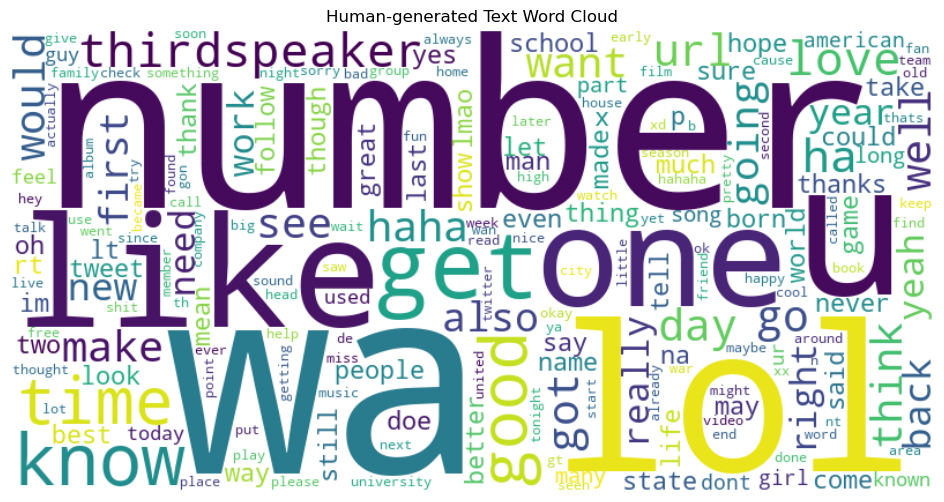

In [44]:
#Used for generating a WordCloud from the frequencies in the human-generated text
human_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(human_text_word_counts)

# Plot WordCloud for human generated text
plt.figure(figsize=(12, 6))
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human-generated Text Word Cloud')
plt.axis('off')
plt.show()


The word cloud for the human-generated text shows that 'Wa,' 'number,' 'lol,' and 'know' are some of the most frequently used words.

Let's do WordCloud for ai generated text

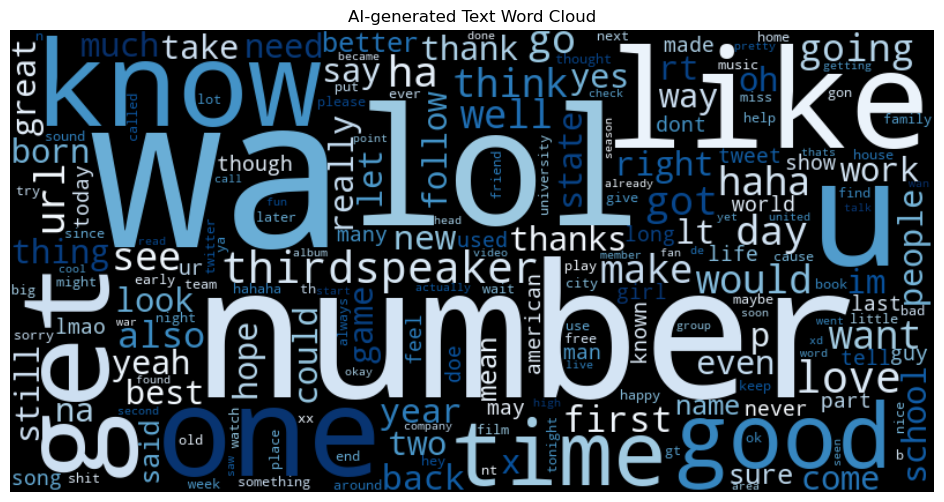

In [45]:
#Used for generating a WordCloud from the frequencies in the AI-generated text
ai_wordcloud = WordCloud(width=800, height=400, colormap='Blues').generate_from_frequencies(human_text_word_counts)

# Plot Word Cloud for AI-generated text
plt.figure(figsize=(12, 6))
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.title('AI-generated Text Word Cloud')
plt.axis('off')
plt.show()

There, we see 'wa,' 'number,' 'lol,' 'like,' and 'unknown' are the most frequently used words in the AI-generated text.

Let's find out whether or not there is a class imbalance in the target variable, as class imbalance can create biased models.







In [46]:
# Count unique classes in the target variable  'text source' column
class_counts = subset_data['text_source'].value_counts()
print(class_counts)

text_source
1    500548
0    499452
Name: count, dtype: int64


There are no class imbalances, so there is no need to balance the data.

/Users/mulualemasmare/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mulualemasmare/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mulualemasmare/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


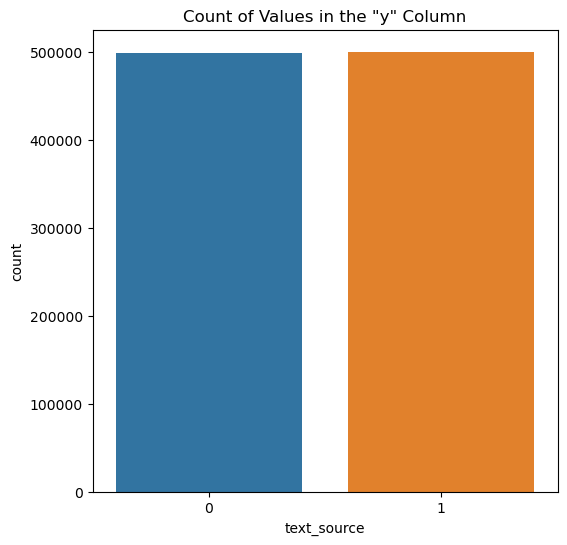

In [47]:
# Create a bar plot to visualize the count of values in the 'y' column
plt.figure(figsize=(6, 6)) 
sns.countplot(x='text_source', data=subset_data)  
plt.title('Count of Values in the "y" Column')  
plt.show()

Let's use N-grams to identify key patterns in AI-generated and human-generated texts. This will give us insights into the similarity and dissimilarity of specific phrases, allowing us to determine which one is more likely generated by AI or human. By examining the dependencies and relationships of the words, we can gain a better understanding of the distinctive language patterns in each type of text.

# N-grams

In [48]:
from nltk import ngrams

In [49]:
# Used to create trigrams for human generated words 
ngrams_3 = nltk.trigrams(filtered_human_words)

# Used to get the freq distribution for  trigrams
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:40]


[(('number', 'number', 'number'), 1296),
 (('url', 'pls', 'rt'), 655),
 (('new', 'york', 'city'), 647),
 (('world', 'war', 'ii'), 584),
 (('love', 'lt', 'number'), 499),
 (('gt', 'url', 'pls'), 454),
 (('wan', 'na', 'go'), 428),
 (('number', 'lt', 'number'), 407),
 (('wa', 'gon', 'na'), 399),
 (('wan', 'na', 'see'), 389),
 (('number', 'year', 'old'), 379),
 (('lt', 'number', 'lt'), 344),
 (('im', 'gon', 'na'), 342),
 (('gon', 'na', 'get'), 316),
 (('check', 'gt', 'url'), 309),
 (('gt', 'gt', 'gt'), 303),
 (('gon', 'na', 'go'), 288),
 (('call', 'number', 'number'), 279),
 (('win', 'ipod', 'touch'), 279),
 (('let', 'u', 'know'), 277),
 (('lt', 'number', 'thirdspeaker'), 260),
 (('opportunity', 'win', 'ipod'), 252),
 (('got', 'ta', 'get'), 251),
 (('url', 'plese', 'rt'), 251),
 (('new', 'south', 'wale'), 240),
 (('register', 'historic', 'place'), 238),
 (('lt', 'number', 'lol'), 234),
 (('national', 'register', 'historic'), 234),
 (('hope', 'feel', 'better'), 231),
 (('cell', 'service', '

Based on the N-grams of the human-generated text, the trigram analysis reveals that the sequence 'finding the number followed by number followed by number' is found 1296 times in human text. Knowing these trigrams allows us to understand which consecutive words can be followed by which word in human text. This information helps distinguish text generated by humans. The same idea also applies to the AI-generated text.

In [50]:
# Used to create trigrams for AI generated words 
ngrams_4 = nltk.trigrams(filtered_ai_words)

# Used to get the freq distribution for  trigrams
freq_4grams = pd.Series(ngrams_4).value_counts().to_dict()
list(freq_4grams.items())[:40]

[(('number', 'number', 'number'), 8505),
 (('hey', 'hey', 'hey'), 3686),
 (('gt', 'gt', 'gt'), 2400),
 (('lt', 'lt', 'lt'), 2163),
 (('rt', 'rt', 'rt'), 2148),
 (('sure', 'going', 'able'), 2145),
 (('think', 'good', 'idea'), 1875),
 (('sure', 'fine', 'sure'), 1860),
 (('fine', 'sure', 'fine'), 1694),
 (('ha', 'ha', 'ha'), 1599),
 (('think', 'ever', 'heard'), 1452),
 (('hey', 'finished', 'watching'), 1300),
 (('sure', 'good', 'thing'), 1088),
 (('sure', 'find', 'way'), 1043),
 (('love', 'lt', 'number'), 1006),
 (('new', 'york', 'city'), 995),
 (('hope', 'great', 'day'), 986),
 (('good', 'idea', 'sure'), 979),
 (('sure', 'able', 'see'), 961),
 (('sure', 'good', 'idea'), 927),
 (('even', 'know', 'talking'), 911),
 (('number', 'lt', 'number'), 863),
 (('lt', 'number', 'lt'), 808),
 (('look', 'googling', 'moviepoint'), 714),
 (('lol', 'know', 'right'), 707),
 (('finished', 'watching', 'look'), 703),
 (('watching', 'look', 'googling'), 700),
 (('moviepoint', 'interested', 'watching'), 697),


Based on the results of the trigram analysis on the AI-generated text, it reveals that the sequence 'finding the number followed by number followed by number' is found 8505 times. Knowing these trigrams allows us to understand which consecutive words can be followed by another word in AI text.

## References
NaveenFream. (2023, September 22). Ai-and-human text. Kaggle. https://www.kaggle.com/datasets/naveenfream/ai-and-human-text 

Stephan, Y. (n.d.). | NLP | LLM | Fine-tuning | QA LoRA T5 | Natural Language Processing (NLP) and Large Language Models (LLM) with Fine-Tuning LLM and make Question answering (QA) with LoRA and Flan-T5 Large. GitHub. https://github.com/YanSte/NLP-LLM-Fine-tuning-QA-LoRA-T5/blob/dff62be80fd83b97c2997e1e2c7fd954fb901a54/nlp-llm-fine-tuning-lora-t5-l.ipynb 